# Classification And Regression Trees

Tekli ağaçda en popüler yöntemdir
* Amaç veri seti içerisindeki karmşık yapıları basit karar yapılarına dönüştürmektir
* Heterojen veri setleri belirlenmiş bir hedef değişkene görel homojen alt gruplara ayırılır
 

# DezAvantajı
- overtitting problemi vardır. Çok fazla dallanma olduğunda eğitim çok iyi ezberleme problemii ortaya çaıkar. 

# Çözüm
- Budama işlemi yapılır belirli bir karmaşıklık parametresi konulur.
- Yine bu karmaşıklık parametresine cross validation yöntemiyle karar verilir
- ayrıca bölünmyi durdurmak için hata kareleri toplamındaki düşüş göz önğne alınıp belirli bir eşik değerin altında olduğunda beliünme durdurulur

# Not:

Genellenibilirlim kaygısı olmadığında CART modeli oldukça başarılıdır tercih edilebilir
Genellemede ise sıkınıt yaşanabilir mesala modeli sadece bir şirketn bir deparmanı kullanacaksa gayet başarlı olur ancak şirketin tüm bölümleri kullancaksa yada tüm ülkeye açılacaksa genellenmiş olur bu durum aşırı öğrnmeye bağlı olarak sorun olloşabilr. eğitim iyice öğrenir meğitimden uzaklaştıkç ahatalar artar  

In [112]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [113]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

# Model

In [88]:
# önce sadece hit değişkenş üzerinden yapıcaz
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

# sadece hits ile final modelin hatası 423.40 oldu

In [114]:
cart=DecisionTreeRegressor()

In [115]:
cart.fit(X_train,y_train)

DecisionTreeRegressor()

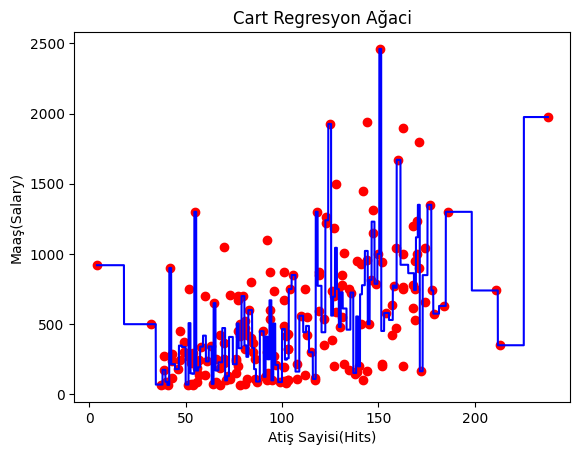

In [91]:
X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color="r")
plt.plot(X_grid,cart.predict(X_grid),color="blue")

plt.title("Cart Regresyon Ağaci")
plt.xlabel("Atiş Sayisi(Hits)")
plt.ylabel("Maaş(Salary)") ;

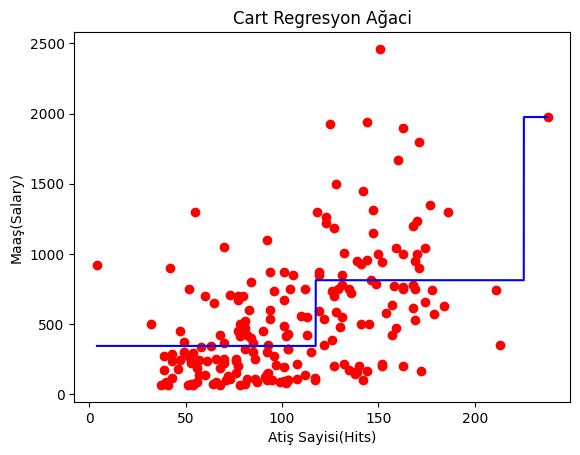

In [92]:
# hocam birde max_leaf_nodes değişkenş girelim ve farkı gözlemleyelim
cart=DecisionTreeRegressor(max_leaf_nodes=3)
cart.fit(X_train,y_train)

X_grid=np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color="r")
plt.plot(X_grid,cart.predict(X_grid),color="blue")

plt.title("Cart Regresyon Ağaci")
plt.xlabel("Atiş Sayisi(Hits)")
plt.ylabel("Maaş(Salary)") ;

#görüldüğü üzere üç katmanlı oldu. buraya girdiğimi sayıya göre x ekseninde kaymanalr oluşur
#mevzu ,nsan eli değmeden burada optimıum sayıyı bulmak

In [116]:
from skompiler import skompile

In [117]:
print(skompile(cart.predict).to("python/code"))

(((920.0 if x[10] <= 10.0 else (((((((67.5 if x[17] <= 0.5 else 68.0) if x[
    15] <= 6.0 else 70.0) if x[18] <= 0.5 else 75.0) if x[6] <= 2.5 else 
    75.0 if x[0] <= 192.5 else 90.0) if x[11] <= 36.0 else 90.0 if x[10] <=
    28.5 else 110.0) if x[7] <= 341.5 else (((90.0 if x[17] <= 0.5 else 
    80.0 if x[15] <= 4.0 else 75.0) if x[11] <= 51.5 else 97.5) if x[13] <=
    218.5 else (100.0 if x[13] <= 636.5 else 91.5) if x[8] <= 104.5 else 
    105.0 if x[11] <= 42.5 else 110.0) if x[15] <= 7.0 else ((125.0 if x[7] <=
    375.0 else 120.0) if x[14] <= 83.0 else 130.0 if x[8] <= 126.0 else 
    140.0) if x[0] <= 423.0 else 87.5 if x[1] <= 101.0 else 100.0) if x[11] <=
    59.5 else ((110.0 if x[11] <= 72.5 else 137.0 if x[1] <= 86.0 else 
    135.0) if x[11] <= 75.5 else ((180.0 if x[12] <= 43.5 else 172.0 if x[
    16] <= 0.5 else 175.0) if x[13] <= 402.5 else 155.0 if x[13] <= 860.0 else
    165.0) if x[10] <= 86.5 else 145.0 if x[3] <= 80.5 else 165.0) if x[12] <=
    79.5 else 2

# Tahmin

In [95]:
# önce ele tahmin yapalım
# hocam normalde bize katsayı veriyordu bizde bu katsayılaı denklemde yerine koyup
# manuel oolarak tahminizi yapıyorduk şimdi elimizdeki zatren pyton kodu biz direk
# tahmin yapmak istediğimz denkelmde yerine yazmak istediğimiz  x değerini belirliyoruz
# bu yeterli oluyor
x=[91]
(345.2011551724138 if x[0] <= 117.5 else 813.0988 if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [96]:
cart.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [97]:
cart.predict([[91]])

array([345.20115517])

In [98]:
y_pred=cart.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066

# Tuning

In [119]:
cart=DecisionTreeRegressor()
cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)


np.sqrt(mean_squared_error(y_test,y_pred))

463.1831797222249

In [101]:
cart=DecisionTreeRegressor(max_leaf_nodes=10)#max leaf sayısı değiştirildi : 486.34
cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)


np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [102]:
cart=DecisionTreeRegressor(max_leaf_nodes=15)#max leaf sayısı artırıldı : 455.83
cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)


np.sqrt(mean_squared_error(y_test,y_pred))

455.8367349677217

In [103]:
cart=DecisionTreeRegressor(max_leaf_nodes=15, min_samples_split=10)#min saple split eklendi : 458.44
cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)


np.sqrt(mean_squared_error(y_test,y_pred))

458.44092458608196

In [104]:
cart=DecisionTreeRegressor(max_leaf_nodes=15, min_samples_split=2)#min saple split 2 yapıldı : 455.83
cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)


np.sqrt(mean_squared_error(y_test,y_pred))

455.8367349677217

In [105]:
cart=DecisionTreeRegressor(min_samples_split=2)#max leaf parametresi çıkarıldı sadece min saples split kaldı
cart.fit(X_train,y_train)
y_pred=cart.predict(X_test)


np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [106]:
cart=DecisionTreeRegressor(min_samples_split=2)#max leaf parametresi çıkarıldı sadece min saples split kaldı
cart.fit(X_train,y_train)
y_pred=cart.predict(X_train)


np.sqrt(mean_squared_error(y_train,y_pred))
# bakın test setinde hat oranı oldukç ayüsekken eğitim setinde 231'e kadar düşt. 
# çok ciddi fark var. Çünkü min sample split=2 yaptığımzda 
# artık modelimiz stokastik(değişken) yapıdan çıkmaya başladı 
# iki değere kadar karar üreten 
# bir if-else yapısı haline geldi

231.67017321152872

In [107]:
# Yukarıdakiler denem amaçlı  modeli anlamak içindi .
# Şimd asıl yapacağımız işe gelelim gridsearch ile uygun parametreleri bulup
# bu parametreler ile model kurucaz

In [120]:
params={"min_samples_split":range(1,100),
        "max_leaf_nodes":range(1,100)}

In [121]:
cart_cv=GridSearchCV(cart,params,cv=10)
cart_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(1, 100),
                         'min_samples_split': range(1, 100)})

In [122]:
cart_cv.best_params_
#hocam başta aralığı 2,10 yaptık ve her iki parametrede 2 olarak çıktı bu 
#sonuçtsan şühelenip aralığı 1,100 olarak değiştirdiğimize 
#sonuçlarda değişti. 
#başlangıç seviyesinde bu şekilde ön tanımlı değer vermeden
#modelin native halindeki paremetreleri gözlemleyip 
#daha sonra paremetrelendirme işlemine geçilebilir

{'max_leaf_nodes': 12, 'min_samples_split': 37}

In [123]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=12, min_samples_split=37)
cart_tuned.fit(X_train,y_train)
y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

375.01595709815194